# New Voter Registration Trends Across the Continental US in 2016 and 2020

## CONTEXT

This project aims to analyze both national and state trends in new voter registrations. Specifically, the impact of COVID-19 on these trends and how it may have increased or decreased registrations. The goal is to reveal clear trends across the country, as well as show any potential exceptions. It's important that people read this notebook so as to understand how the pandemic can affect our elections.

**Research Questions**
1. Prior to the pandemic, how did the nation's number of registered voters compare from 2016 to 2020? What could explain the difference?
2. In Illinois, a midwestern and mostly rural state, how did the pandemic affect its voter registration numbers in 2020 compared to 2016?

## 0. Loading Necessary Libraries

1. pandas - Used for data manipulation.
2. matplotlib - Used for plotting data.
3. seaborn - Used for stylizing visualizations.
4. geopandas - Used for geospatial data.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## -------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Loading in Voting Data

Raw Data Source: [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/)

Data Context: [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration)
The csv from the raw data link is read as the dataframe, 'voters'.

In [27]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


## -------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Data Processing and Interpretation

### Preview: The First 5 Rows of the Data

Using the `head()` function, the first 5 rows of the data is previewed.

In [28]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


### Column Explanations

* **Jurisdiction** shows the state of the collected voter data.
* **Year** shows whether the data is from 2016 or 2020.
* **Month** shows what month the data was collected, January through latest May.
* **New registered voters** shows how many new voters were gained in that specified  time period and location.

### Missing Data Check


Using the `isna()` function returns boolean values showing if there are any empty values in the dataframe `'voters'`. `values.any()` checks if there are values present. In this case, **there aren't any missing data points.**

In [29]:
voters.isna().values.any()

False

### Data Info

* `.info()` is used to gather the dtypes of the columns.
* **Jurisdiction is an object, Year is an integer (int64), Month is an object, and New Registered Voters are an integer (int64). Objects are strings essentially, while integers contain integers.**

In [30]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [31]:
voters = voters.rename(
    columns = {
        "Jurisdiction" : "NAME",
        "New registered voters" : "registered_voters"
        }
    )
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


**The columns were renamed using the rename function.**

Explain any potential limitations to your data (2 points)

**This data is limited in that it doesn't contain data from every state in the United States. It also only contains data from two years, 2016 and 2020. It doesn't contain any data from before January either, making it hard to establish a baseline registration level. All these points make it difficult to make accurate interpretations.**

## -------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Data Analysis

### Highest Number of Voter Registrations

**The highest amount of new voter registration was 238,281. This was in California, February 2020.**

In [32]:
voters.loc[
    voters["registered_voters"] == voters["registered_voters"].max()
    ]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


### Average Number of Voter Registrations

**The average voter registration is around 48,223 people.**

In [33]:
avg_reg = voters.registered_voters.mean()
avg_reg

48223.46226415094

### Voter Registration Above National Average

`high_voters` is a new dataframe created that calculates when states have higher than the national average of voter registration.

In [34]:
high_voters = voters[
    voters.registered_voters > avg_reg
]

high_voters.head(5)

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377


**Voter registration was higher than the national average number 36 times.**

In [35]:
len(high_voters)

36

* Texas went above the average 8 times
* California did 7 times
* Florida did 7 times
* North Carolina did 6 times
* Illinois did 4 times
* Arizona did 3 times
* Georgia did 1 time.

In [36]:
high_voters["NAME"].value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


**California (144,545), Texas (114,610), and Florida (65,868) had the top 3 highest average voter registration numbers.**

In [37]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


## -------------------------------------------------------------------------------------------------------------------------------------------------------------

## 4. Data Visualization

### Total Voter Registration by State

**Generally, larger states like Texas and California have higher voter registration numbers than smaller states like District of Columbia and Delaware, which have the least amount of voter registration. Most states that aren't the outliers of highest registration or the lowest registration also seem to fall around 20,000 to 60,000 voter registrations.**

In [38]:
state_totals = voters.groupby("NAME")["registered_voters"].sum().reset_index()
state_totals.head(3)

,NAME,registered_voters
0,Arizona,282492
1,California,1156363
2,Colorado,164220


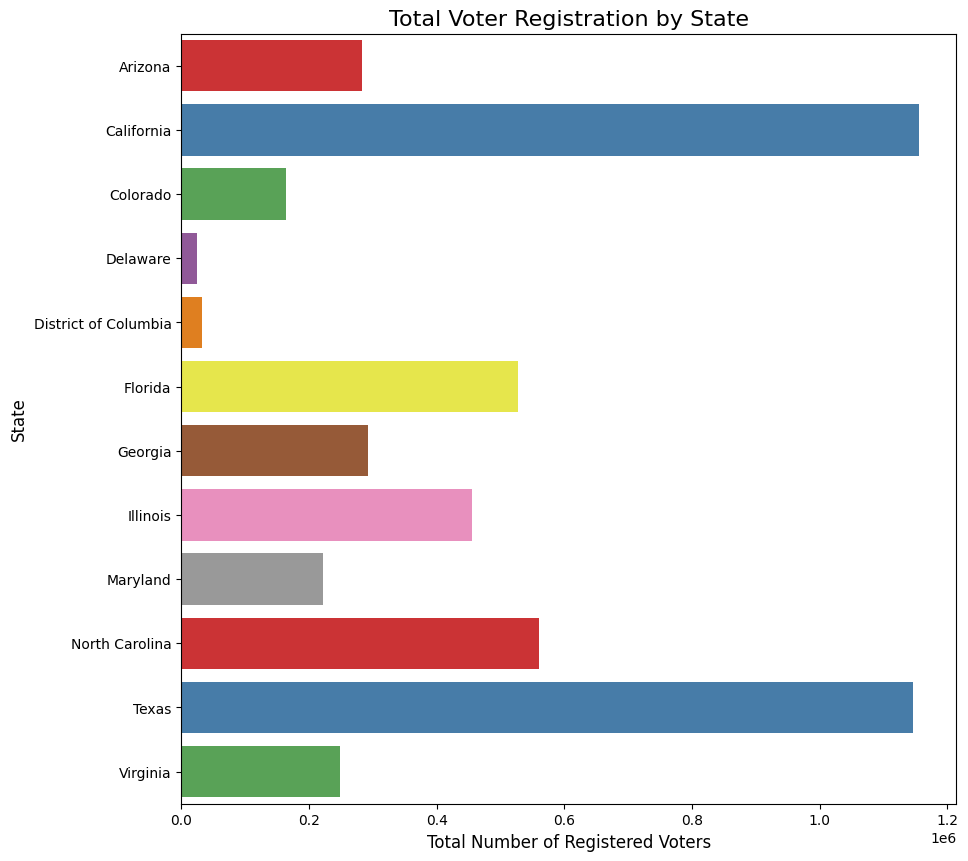

In [39]:
plt.figure(figsize = (10,10))
sns.barplot(state_totals, x="registered_voters", y="NAME", palette = "Set1", hue="NAME")
plt.xlabel("Total Number of Registered Voters", fontsize = 12)
plt.ylabel("State", fontsize = 12)
plt.title("Total Voter Registration by State", fontsize = 16)
plt.show()

### 2016 vs 2020

**A barplot is displayed below, comparing 2016 and 2020's new voter registration trends across similar months. While 2016 seems to follow a relatively normal distribution, 2020 at first outpaces 2016 from Jan-Feb, but 2020 experiences a steep drop off beginning in March.**

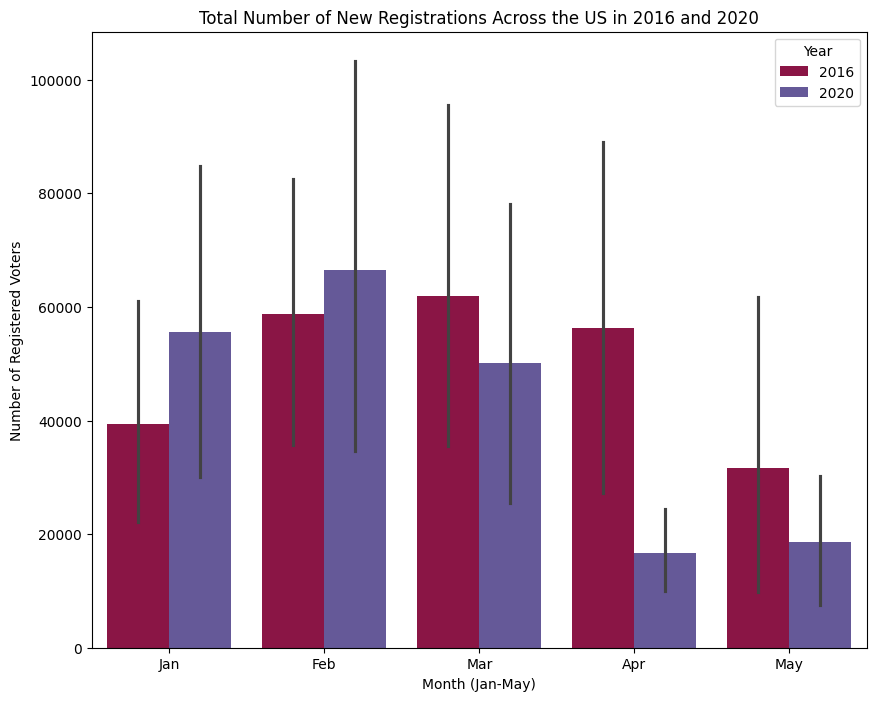

In [40]:
plt.figure(figsize = (10,8))
sns.barplot(voters, x = "Month", y = "registered_voters", palette = "Spectral", hue="Year")
plt.xlabel("Month (Jan-May)")
plt.ylabel("Number of Registered Voters")
plt.title("Total Number of New Registrations Across the US in 2016 and 2020")
plt.show()

### Research: Illinois Study

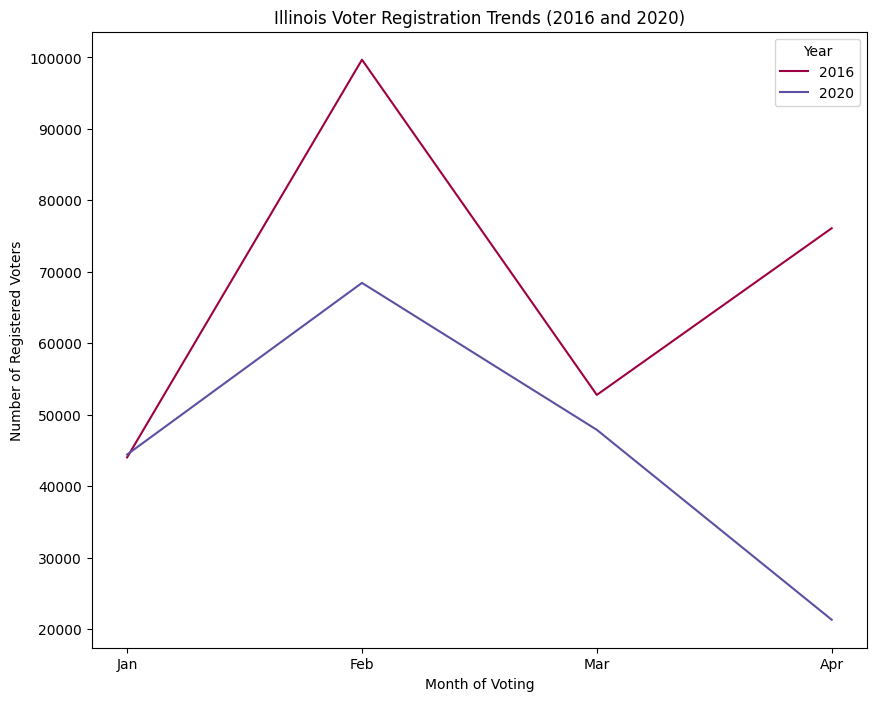

In [41]:
plt.figure(figsize = (10,8))
voters_illinois = voters[
    voters['NAME'] == "Illinois"
]
sns.lineplot(voters_illinois, x = "Month", y = "registered_voters", palette = "Spectral", hue="Year")
plt.xlabel("Month of Voting")
plt.ylabel("Number of Registered Voters")
plt.title("Illinois Voter Registration Trends (2016 and 2020)")
plt.show()

## -------------------------------------------------------------------------------------------------------------------------------------------------------------

## 5. Data Mapping

### Loading in Shapefiles

fatal: destination path '325-Datasets' already exists and is not an empty directory.


<Axes: >

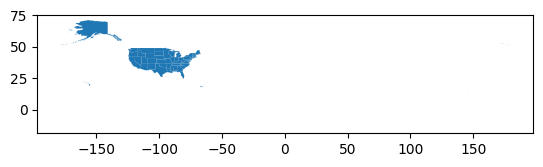

In [42]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)
states.plot()

### Adjusting Bounding Box

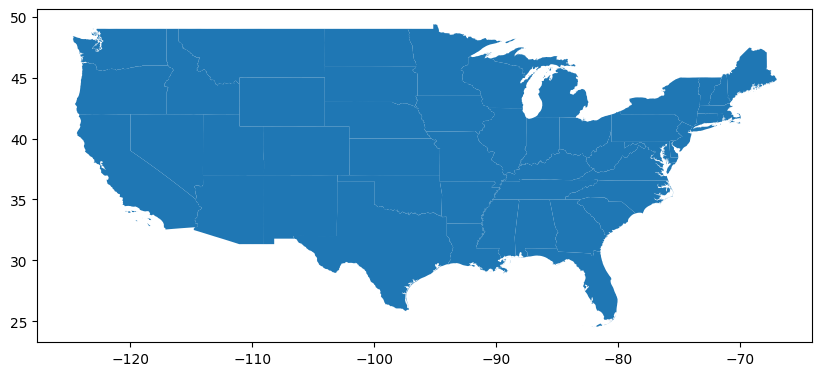

In [43]:
minx, miny, maxx, maxy = -125, 24, -66, 49
us_states = states.cx[minx:maxx, miny:maxy]

us_states.plot(figsize=(10, 10))
plt.show()

### Average Voter Registration per State

#### Dataframe Creation

In [44]:
avg_reg_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_reg_state

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


#### Merge Dataframe w/ Mapping Data

In [45]:
state_avgs = us_states.merge(avg_reg_state, on="NAME", how="inner")
state_avgs = state_avgs.drop(columns=["STATEFP","STATENS","LSAD","AFFGEOID","ALAND","AWATER"])
state_avgs.head(3)

,GEOID,STUSPS,NAME,geometry,registered_voters
0,37,NC,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,VA,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,FL,Florida,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125


#### Plot of Map

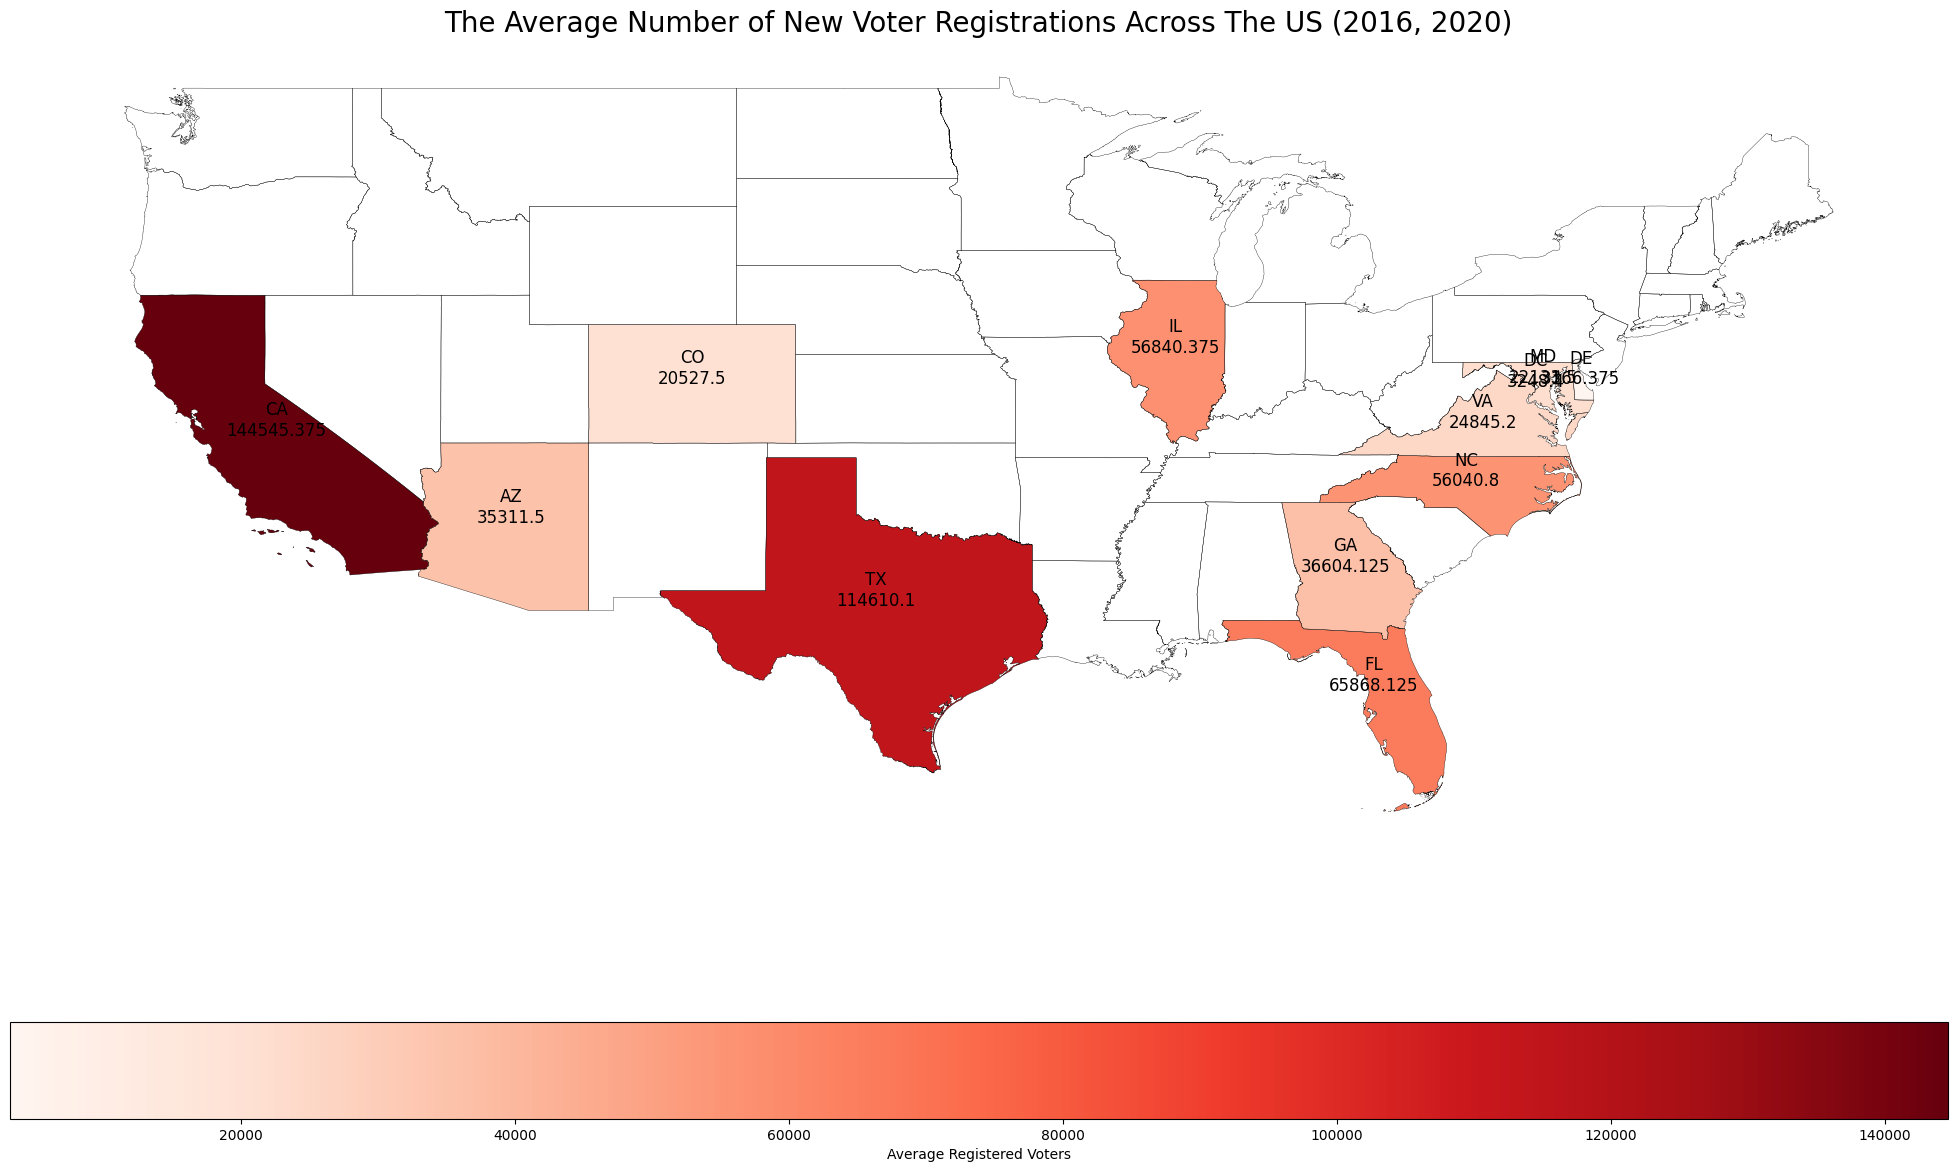

In [46]:
fig = plt.figure(1, figsize=(25,15))
ax = fig.add_subplot()

us_states.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.25
)
state_avgs.plot(
    column="registered_voters",
    ax=ax,
    legend=True,
    cmap="Reds",
    legend_kwds={
        "label": "Average Registered Voters",
        "orientation" : "horizontal"
    }
)

state_avgs.apply(
    lambda x: ax.annotate(
        text=f"{x.STUSPS}\n{x.registered_voters}",
        xy=(x.geometry.centroid.x, x.geometry.centroid.y),
        ha="center",fontsize=12),
    axis=1)

plt.axis("off")
plt.title("The Average Number of New Voter Registrations Across The US (2016, 2020)", fontsize = 20)
plt.show()

## -------------------------------------------------------------------------------------------------------------------------------------------------------------

## 6. Conclusions

### **Insights:**
From this notebook, one can gauge several aspects of voter registration trends not only across time, but across regions of the US. It was revealed that while 2020 initially outpaced 2016 in terms of new voter registrations from Jan-Feb of the voting season, a steep dropoff put 2020's numbers behind that of 2016's beginning in March. Additionally, it seems that there are larger numbers of new voter registrations overall in states that have more size, such as Texas and California, compared to smaller ones.

### **Suggestions:**
From this notebook, I'd suggest that you focus new voter registration efforts into Colorado, Virginia, and Georgia. These are large states that seem to be lagging behind in terms of new voter registrations. I'd also suggest that for states like Texas and California, less resources can be put into new voter registration efforts there, as they enjoy a high number of registrations already.

### **Next Steps:**
To continue effective work on this project, more data is necessary. Instead of only two years, more data is required in between 2016 and 2020, as well as more recent data that is unaffected by the pandemic. It might also be necessary to analyze the specific counties of each state, so as to not aggregate regions into one and make broad assumptions. Lastly, more states than just the 11 provided will be necessary.

## -------------------------------------------------------------------------------------------------------------------------------------------------------------

## Github Link

https://github.com/PrestonZheng/325-Midterm

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Preston Zheng